In [237]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [238]:
sns.set()
# Load Dataset

df = pd.read_csv("StudentPerformanceFactors.csv")

# Display first 5 rows
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [239]:
print(df.isna())

      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             False       False                 False                False   
1             False       False                 False                False   
2             False       False                 False                False   
3             False       False                 False                False   
4             False       False                 False                False   
...             ...         ...                   ...                  ...   
6602          False       False                 False                False   
6603          False       False                 False                False   
6604          False       False                 False                False   
6605          False       False                 False                False   
6606          False       False                 False                False   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores 

In [240]:
print(df.isna().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [241]:
df.duplicated()[df.duplicated()==True]

,0


In [242]:
print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (6607, 20) 

number of rows:  6607
number of columns:  20


In [243]:
df.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


In [244]:
num_cols = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours',
    'Previous_Scores', 'Tutoring_Sessions',
    'Physical_Activity', 'Exam_Score'
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip())
df.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


In [245]:
df.describe(include='all')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


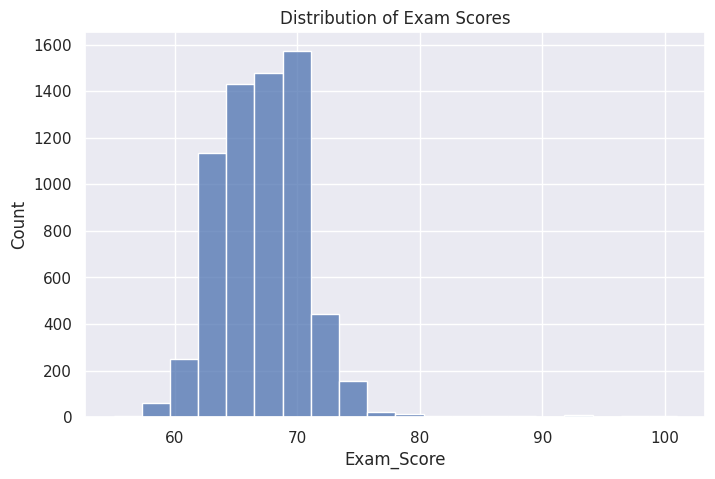

In [246]:
plt.figure(figsize=(8,5))
sns.histplot(df['Exam_Score'], bins=20)
plt.title("Distribution of Exam Scores")
plt.show()


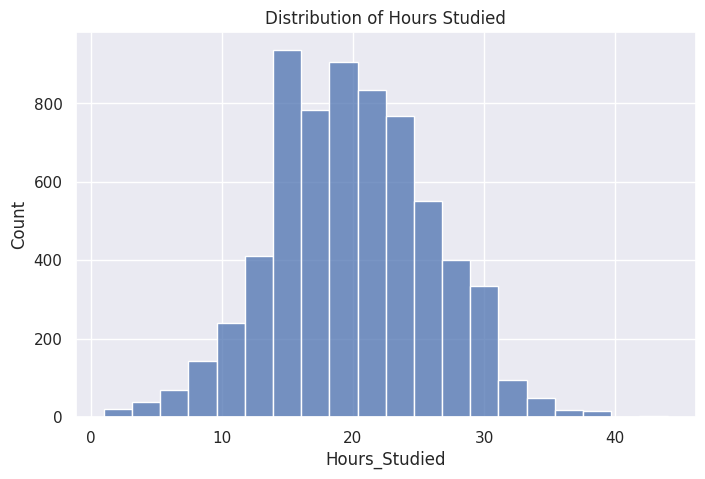

In [247]:
plt.figure(figsize=(8,5))
sns.histplot(df['Hours_Studied'], bins=20)
plt.title("Distribution of Hours Studied")
plt.show()


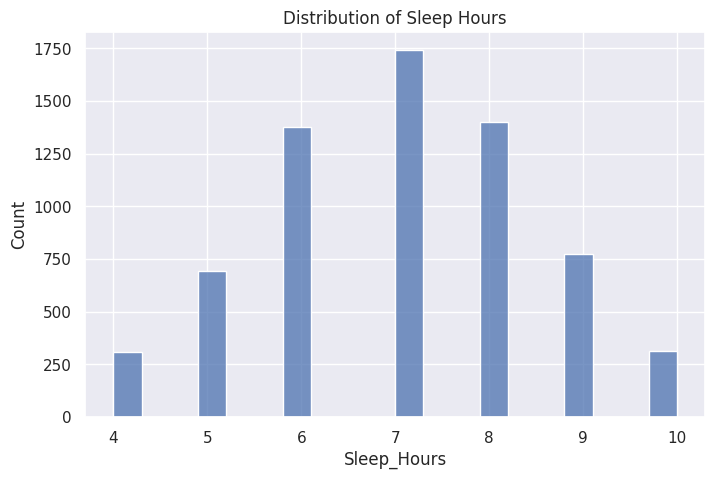

In [248]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sleep_Hours'], bins=20)
plt.title("Distribution of Sleep Hours")
plt.show()


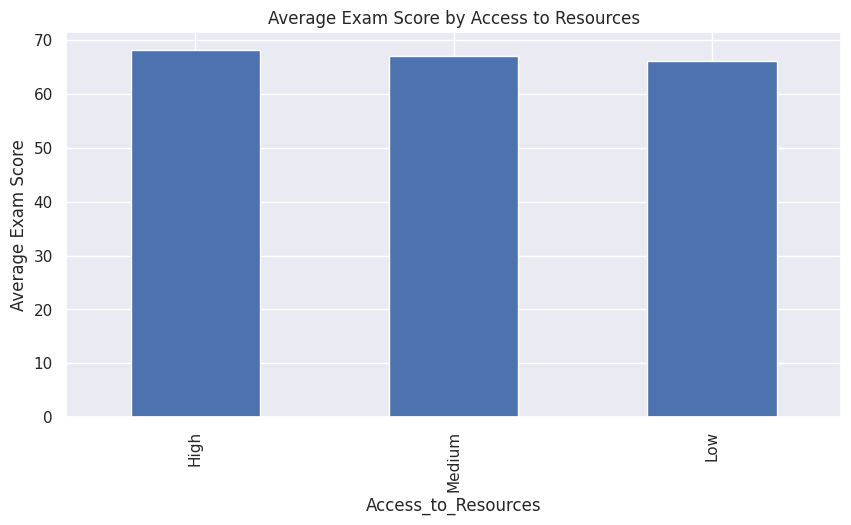

,Exam_Score
Access_to_Resources,
High,68.092152
Medium,67.134378
Low,66.203351


In [249]:
resource_scores = df.groupby('Access_to_Resources')['Exam_Score'] \
                    .mean() \
                    .sort_values(ascending=False)

plt.figure(figsize=(10,5))
resource_scores.plot(kind='bar')
plt.title("Average Exam Score by Access to Resources")
plt.ylabel("Average Exam Score")
plt.show()

resource_scores


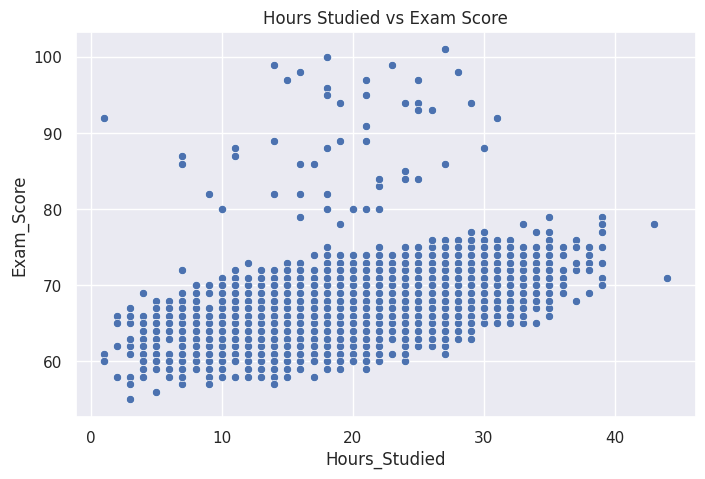

In [250]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Hours Studied vs Exam Score")
plt.show()


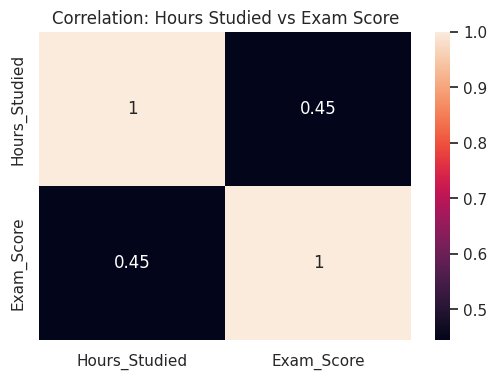

In [251]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['Hours_Studied', 'Exam_Score']].corr(),
    annot=True
)
plt.title("Correlation: Hours Studied vs Exam Score")
plt.show()


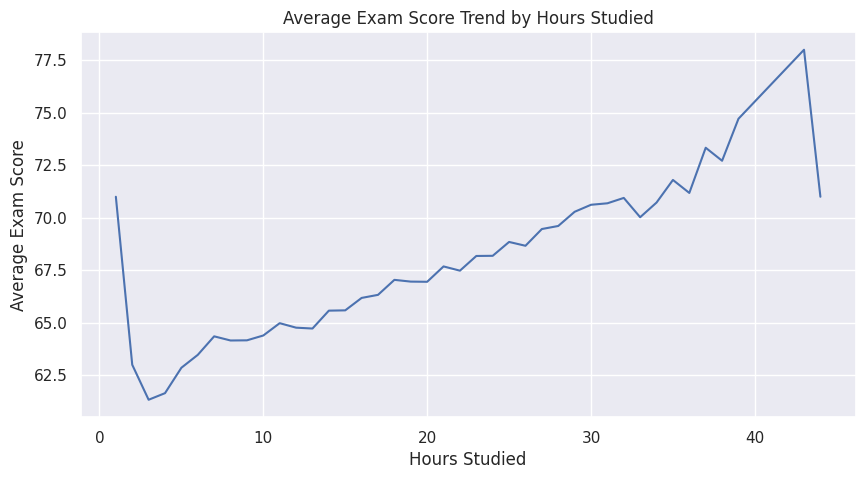

,Exam_Score
Hours_Studied,
1,71.000000
2,63.000000
3,61.333333
4,61.647059
5,62.857143
6,63.470588
7,64.352941
8,64.155172
9,64.162791


In [252]:
study_trend = df.groupby('Hours_Studied')['Exam_Score'].mean()

plt.figure(figsize=(10,5))
study_trend.plot()
plt.title("Average Exam Score Trend by Hours Studied")
plt.ylabel("Average Exam Score")
plt.xlabel("Hours Studied")
plt.show()

study_trend
